<a href="https://colab.research.google.com/github/AishwaryaDeviA/Weather-Forecasting-ML-algorithms/blob/main/Pheonix_weather_Pred_NeuralProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle
import seaborn as sns

In [13]:
!pip install --upgrade pandas


In [14]:
df = pd.read_csv('PhxWeather2.csv')

In [18]:
x = df.iloc[:,5:12]

<Axes: >

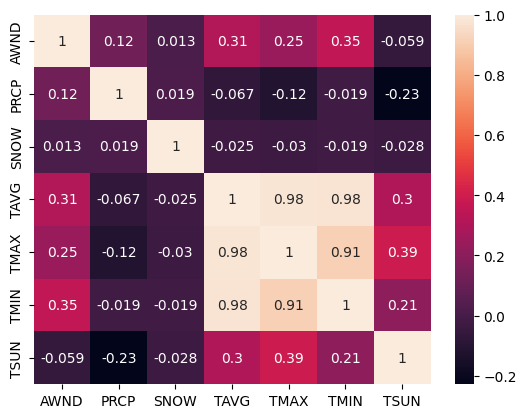

In [22]:
sns.heatmap(x.corr(), annot = True)

In [16]:
df.dtypes

STATION     object
NAME        object
DATE        object
ACMC       float64
ACSC       float64
AWND       float64
PRCP       float64
SNOW       float64
TAVG       float64
TMAX       float64
TMIN       float64
TSUN       float64
WT01       float64
WT02       float64
WT03       float64
WT04       float64
WT05       float64
WT06       float64
WT07       float64
WT08       float64
WT09       float64
WT10       float64
WT11       float64
WT13       float64
WT14       float64
WT16       float64
WT18       float64
WT21       float64
WV03       float64
WV07       float64
WV20       float64
dtype: object

In [17]:
phx = df
phx['Date'] = pd.to_datetime(df['DATE'])
phx.dtypes

STATION            object
NAME               object
DATE               object
ACMC              float64
ACSC              float64
AWND              float64
PRCP              float64
SNOW              float64
TAVG              float64
TMAX              float64
TMIN              float64
TSUN              float64
WT01              float64
WT02              float64
WT03              float64
WT04              float64
WT05              float64
WT06              float64
WT07              float64
WT08              float64
WT09              float64
WT10              float64
WT11              float64
WT13              float64
WT14              float64
WT16              float64
WT18              float64
WT21              float64
WV03              float64
WV07              float64
WV20              float64
Date       datetime64[ns]
dtype: object

In [23]:
phx = phx.drop('DATE', axis = 1)

In [24]:
phx

AttributeError: 'Index' object has no attribute '_format_flat'

           STATION                    NAME  ACMC  ACSC  AWND  PRCP  SNOW  \
0      USW00023183  PHOENIX AIRPORT, AZ US   NaN   NaN   NaN   0.0   0.0   
1      USW00023183  PHOENIX AIRPORT, AZ US   NaN   NaN   NaN   0.0   0.0   
2      USW00023183  PHOENIX AIRPORT, AZ US   NaN   NaN   NaN   0.0   0.0   
3      USW00023183  PHOENIX AIRPORT, AZ US   NaN   NaN   NaN   0.0   0.0   
4      USW00023183  PHOENIX AIRPORT, AZ US   NaN   NaN   NaN   0.0   0.0   
...            ...                     ...   ...   ...   ...   ...   ...   
27075  USW00023183  PHOENIX AIRPORT, AZ US   NaN   NaN  5.37   0.0   0.0   
27076  USW00023183  PHOENIX AIRPORT, AZ US   NaN   NaN  4.70   0.0   0.0   
27077  USW00023183  PHOENIX AIRPORT, AZ US   NaN   NaN  5.82   0.0   0.0   
27078  USW00023183  PHOENIX AIRPORT, AZ US   NaN   NaN   NaN   0.0   0.0   
27079  USW00023183  PHOENIX AIRPORT, AZ US   NaN   NaN   NaN   NaN   NaN   

       TAVG  TMAX  TMIN  ...  WT11  WT13  WT14  WT16  WT18  WT21  WV03  WV07  \
0      

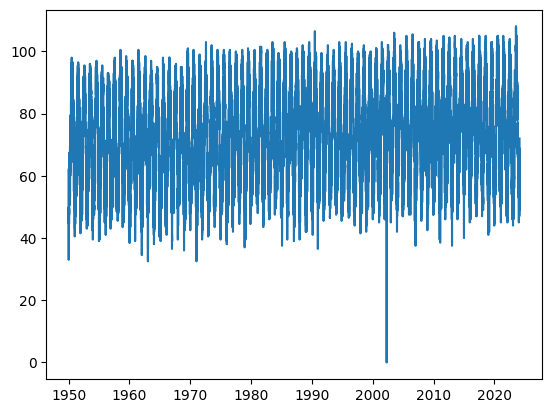

In [25]:
plt.plot(phx['Date'], phx['TAVG'])
plt.show()

In [26]:
data = phx[['Date', 'TAVG']]
data.columns = ['ds', 'y']

In [27]:
data

AttributeError: 'Index' object has no attribute '_format_flat'

              ds     y
0     1950-01-01  62.0
1     1950-01-02  60.0
2     1950-01-03  40.0
3     1950-01-04  33.0
4     1950-01-05  34.0
...          ...   ...
27075 2024-02-17  62.0
27076 2024-02-18  63.0
27077 2024-02-19  65.0
27078 2024-02-20  67.0
27079 2024-02-21  72.0

[27080 rows x 2 columns]

In [28]:
m = NeuralProphet()
m.fit(data, freq = 'D', epochs = 1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.996% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.996% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.data.processing._handle_missing_data) - Dropped 16 rows with NaNs in 'y' column.
INFO:NP.data.processing:Dropped 16 rows with NaNs in 'y' column.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralPro

Finding best initial lr:   0%|          | 0/260 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

AttributeError: 'Index' object has no attribute '_format_flat'

            MAE        RMSE      Loss  RegLoss  epoch
0    101.061951  117.864449  0.678814      0.0      0
1     15.279592   18.991879  0.039779      0.0      1
2      6.688067    8.861046  0.008823      0.0      2
3      5.332081    6.877599  0.005717      0.0      3
4      4.931857    6.288168  0.004936      0.0      4
..          ...         ...       ...      ...    ...
995    4.302074    5.411792  0.003925      0.0    995
996    4.302023    5.414138  0.003928      0.0    996
997    4.301991    5.409760  0.003923      0.0    997
998    4.299794    5.408164  0.003923      0.0    998
999    4.302528    5.412046  0.003924      0.0    999

[1000 rows x 5 columns]

In [29]:
future = m.make_future_dataframe(data, periods = 900)
forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.996% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.996% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 212it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [30]:
plot1 = m.plot(forecast)
plot1

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


In [31]:
plt2 = m.plot_components(forecast)
plt2

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


In [ ]:
with open('saved_model.pk1', "wb") as f:
    m = pickle.dump(m,f)

In [ ]:
with open('saved_model.pkl', "rb") as f:
    m = pickle.load(f)
future = m.make_future_dataframe(data, periods = 900)
forecast = m.predict(future)